In [1]:
import pickle 
import numpy as np
import os

In [3]:
np.round(np.arange(0,1000,100),4)

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

In [2]:
#problem parameters
grid = (2,2)
d = (grid[0] - 1) * (grid[0] - 1) * 2 + 2 * (grid[0] - 1) # num of arcs
num_train = 100
num_feat = 1 # size of feature
num_test = 1000
e = 0.5 # scale of normal std or the range of uniform. For the error term
lower = 0 # coef lower bound
upper = 1 # coef upper bound
p = num_feat # num of features
num_nodes = grid[0]*grid[0]
alpha = e # scale of normal std or the range of uniform. For the error term
coef_seed = 1
x_dist = 'uniform'
e_dist = 'normal'
x_low = -2
x_up = 2
x_mean = 2
x_var = 2
bump = 100

deg_set= [1.0]
#evaluate algs of dataset replications from rep_st to rep_end
reps_st = 0 #0 #can be as low as 0
reps_end = 20 #1 #can be as high as 50
iteration_all = np.arange(reps_st,reps_end)
max_depth = 3
mu_all = np.round(np.arange(0.6,1.0,0.05),4)
lamb_all = np.round(np.arange(0.4,0.8,0.05),4)
lamb_all = np.round(np.arange(0,1000,100),4)
lamb_all[0] = 50

In [ ]:
# data_generation_process = "SPO_Data_Generation"
# current_directory = os.getcwd()
# parent_directory = os.path.dirname(current_directory)
# grandparent_directory = os.path.dirname(parent_directory)
# DataPath_parent = grandparent_directory + '/Data_JOC_R1/Shortest_Path_Tree/'+str(grid[0])+'by'+str(grid[1])+'_grid_' + data_generation_process + "_test/"
# print("DataPath_parent:", DataPath_parent)
# result_dir = DataPath_parent +"result/Data_size="+str(num_train)+"/"
# print("result_dir:", result_dir)

In [3]:
result_dir = "/Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Tree/3by3_grid_depth_3_0629/result/Data_size=100/deg=1.0/"
result_dir

'/Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path_Tree/3by3_grid_depth_3_0629/result/Data_size=100/deg=1.0/'

In [4]:
with open(result_dir+'cost_Oracle.pkl', "rb") as tf:
    cost_Oracle = pickle.load(tf)
with open(result_dir+'cost_MSE.pkl', "rb") as tf:
    cost_MSE = pickle.load(tf)
with open(result_dir+'cost_SPO.pkl', "rb") as tf:
    cost_SPO = pickle.load(tf)
with open(result_dir+'cost_DDR.pkl', "rb") as tf:
    cost_DDR = pickle.load(tf)

In [5]:
from scipy.stats import gaussian_kde
from matplotlib import gridspec
import seaborn as sns
import matplotlib.pyplot as plt
def Upright_Figure(all_x, all_y, figure_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], 
                        ymin = 0, ymax=100,xmin = 0,xmax = 100):
    
    data = np.asarray([all_x,all_y])

    ####### Obtain KDE  
    #KDE for top marginal
    kde_X = gaussian_kde(data[0])
    #KDE for right marginal
    kde_Y = gaussian_kde(data[1])

    x = np.linspace(0, 100, 100)
    y = np.linspace(ymin, ymax, 100)

    dx = kde_X(x) # X-marginal density
    dy = kde_Y(y) # Y-marginal density

    #Define grid for subplots
    gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios = [1, 3])

    ####### Create scatter plot
    fig = plt.figure(figsize = size)
    ax = plt.subplot(gs[1, 0])
    cax = ax.scatter(data[0], data[1], s = 15, color='#003D7C', marker = "o", edgecolors = "#EF7C00")
    plt.xlabel('Head-to-head (%)')

    plt.ylabel('Regret reduction (%)') #pio
    plt.vlines(50, ymin, ymax, linestyle="dashed", alpha = 0.8,color = 'k')
    plt.hlines(0, xmin, xmax, linestyle="dashed", alpha = 0.8,color = 'k')

    # ####### Create Y-marginal (right)
    axr = plt.subplot(gs[1, 1], xticks = [], yticks = [], frameon = False)
    axr.plot(dy, y, color = 'black')

    axr.fill_betweenx(y, 0, dy, where = y <= 0.01, alpha = 1, color='#EF7C00')
    axr.fill_betweenx(y, 0, dy, where = y >= 0, alpha = 1, color='#003D7C')

    leftarea = np.round( sum(n <= 0 for n in all_y)/len(all_y),2 )
    rightarea = np.round( sum(n > 0 for n in all_y)/len(all_y),2 )

    axr.annotate(leftarea, xy=(0.15, abs(ymin)/(ymax - ymin) + move[0]), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)
    axr.annotate(rightarea, xy=(0.15, abs(ymin)/(ymax - ymin) + move[1]), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)

    # ####### Create X-marginal (top)
    axt = plt.subplot(gs[0,0], frameon = False, yticks = [], xticks = [])
    #base = pyplot.gca().transData
    #rot = transforms.Affine2D().rotate_deg(180)
    axt.plot(x, dx, color = 'black')
    axt.fill_between(x, 0, dx, where = x >= 49.9, alpha= 1, color = '#003D7C')
    axt.fill_between(x, 0, dx, where = x <= 50, alpha= 1, color = '#EF7C00')

    #     axt.invert_yaxis()
    leftarea = np.round( sum(n <= 50 for n in all_x)/len(all_x),2 )
    rightarea = np.round( sum(n > 50 for n in all_x)/len(all_x),2 )

    axt.annotate(leftarea, xy=(move[2], 0.15), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)
    axt.annotate(rightarea, xy=(move[3], 0.15), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)

    # ####### Bring the marginals closer to the scatter plot and save eps file
    fig.tight_layout(pad = 1)
    # # plt.savefig(figure_name + '.eps', format='eps')
    plt.savefig(figure_name + '.pdf', format='pdf')

In [6]:
def cross_compare2plus(c_item, c_base, c_oracle):
    N = len(c_item)
    c_diff = c_base - c_item
    lbel = np.zeros((N,1))
    
    equals = np.sum(c_diff == 0)
    wins = np.sum(c_diff > 0) # indicate num of c_item is lower than c_base
    lose = np.sum(c_diff < 0)
    
    lbel[c_diff < 0] = 1
    lbel[c_diff > 0] = -1
    
#     print(N, equals, wins, lose)
    if N == equals:
        win_ratio = 0.5
    else:
        win_ratio = wins/(N - equals)
    cost_reduction = (np.nanmean(c_diff))/np.abs(np.nanmean(c_base))
    if np.nanmean(c_base) - np.nanmean(c_oracle) <= 1e-6:
        regret_reduction = 0.0
    else:
        regret_reduction = (np.nanmean(c_diff))/np.abs(np.nanmean(c_base) - np.nanmean(c_oracle))
    return win_ratio, cost_reduction, regret_reduction

In [7]:
def calculate_Main_vs_Benchmark_h2h_regret(iteration_all,cost_Main,cost_bench,cost_Oracle_Ante_all):
    
    h2h_ = np.zeros(len(iteration_all)); cost_rd_ = np.zeros(len(iteration_all)); regret_rd_ = np.zeros(len(iteration_all))
    for iter_index in range(len(iteration_all)):
        iter = iteration_all[iter_index]
        h2h_[iter_index],cost_rd_[iter_index],regret_rd_[iter_index] = cross_compare2plus(cost_Main[iter], cost_bench[iter], cost_Oracle_Ante_all[iter])

    # return h2h_post,regret_post,h2h_ante,regret_ante
    return h2h_,regret_rd_

In [8]:
h2h_ddr_vs_spo = {}; regret_rd_ddr_vs_spo = {}
h2h_ddr_vs_mse = {}; regret_rd_ddr_vs_mse = {}
for deg in deg_set:
    for mu in mu_all:
        for lamb in lamb_all:
            cost_DDR_mu_lamb = {}
            cost_SPO_deg = {}
            cost_Oracle_deg = {}
            cost_MSE_deg = {}
            for iter in iteration_all:
                cost_DDR_mu_lamb[iter] = np.asarray(cost_DDR[mu,lamb,deg,iter])
                cost_SPO_deg[iter] = np.asarray(cost_SPO[deg,iter])
                cost_Oracle_deg[iter] = np.asarray(cost_Oracle[deg,iter])
                cost_MSE_deg[iter] = np.asarray(cost_MSE[deg,iter])
            h2h_ddr_vs_spo[deg,mu,lamb],regret_rd_ddr_vs_spo[deg,mu,lamb] = calculate_Main_vs_Benchmark_h2h_regret(iteration_all,cost_DDR_mu_lamb,cost_SPO_deg,cost_Oracle_deg)
            h2h_ddr_vs_mse[deg,mu,lamb],regret_rd_ddr_vs_mse[deg,mu,lamb] = calculate_Main_vs_Benchmark_h2h_regret(iteration_all,cost_DDR_mu_lamb,cost_MSE_deg,cost_Oracle_deg)

In [9]:
mu_all

array([0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [10]:
lamb_all

array([ 50, 100, 200, 300, 400, 500, 600, 700, 800, 900])

##### DDR vs SPO

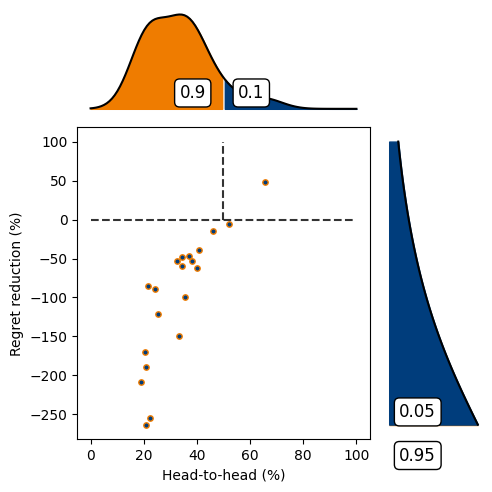

In [34]:
deg = deg_set[0]
mu = mu_all[0]
lamb = lamb_all[7]
figure_name = result_dir + f"ddr_vs_spo_mu={mu}_lamb={lamb}_deg={deg}"
Upright_Figure(h2h_ddr_vs_spo[deg,mu,lamb]*100, regret_rd_ddr_vs_spo[deg,mu,lamb]*100, figure_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], 
                        ymin = 0, ymax=100,xmin = 0,xmax = 100)

In [ ]:
regret_rd_ddr_vs_spo_tem = regret_rd_ddr_vs_spo[deg,mu,lamb]
true_indices = [(regret_rd_ddr_vs_spo_tem[iter] > -2) and (regret_rd_ddr_vs_spo_tem[iter] < 2) for iter in iteration_all]

In [ ]:
regret_rd_ddr_vs_spo_tem[true_indices] * 100

In [ ]:
deg = deg_set[0]
mu = mu_all[4]
lamb = lamb_all[0]
figure_name = result_dir + f"ddr_vs_spo_mu={mu}_lamb={lamb}_deg={deg}"
Upright_Figure(h2h_ddr_vs_spo[deg,mu,lamb][true_indices]*100, regret_rd_ddr_vs_spo[deg,mu,lamb][true_indices]*100, figure_name, size = (5, 5), move = [0.35, 0.55, 0.35, 0.55], 
                        ymin = 0, ymax=100,xmin = 0,xmax = 100)

##### DDR vs MSE

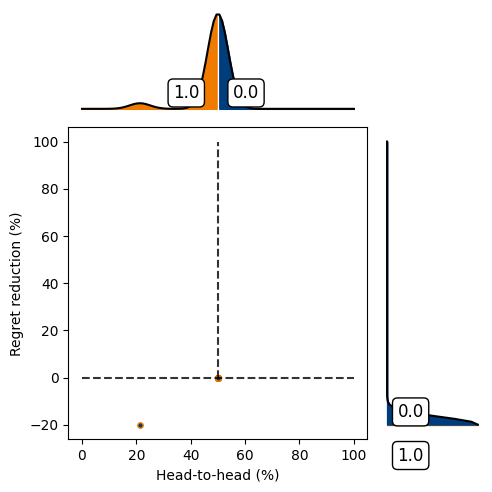

In [33]:
deg = deg_set[0]
mu = mu_all[0]
lamb = lamb_all[2]
figure_name = result_dir + f"ddr_vs_mse_mu={mu}_lamb={lamb}_deg={deg}"
Upright_Figure(h2h_ddr_vs_mse[deg,mu,lamb]*100, regret_rd_ddr_vs_mse[deg,mu,lamb]*100, figure_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], 
                        ymin = 0, ymax=100,xmin = 0,xmax = 100)